In [1]:
import numpy as np
from scipy import *

# 1. Special function

In [10]:
%matplotlib inline
from scipy.special import jn, yn, jn_zeros, yn_zeros
import matplotlib.pyplot as plt

In [12]:
n = 0
X = 0.0

print("J_%d(%f) = %f" % (n, X, jn(n,X)))

J_0(0.000000) = 1.000000


In [13]:
X = 1.0
print("Y_%d(%f) = %f" % (n,X,yn(n,X)))

Y_0(1.000000) = 0.088257


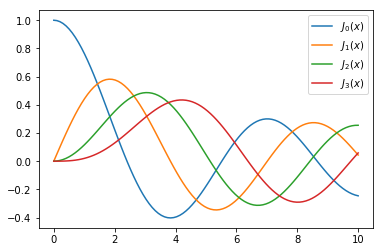

In [16]:
X = linspace(0,10,100)
fig, ax = plt.subplots()
for n in range(4):
    ax.plot(X,jn(n,X),label=r"$J_%d(x)$" % n)
ax.legend();


In [17]:
n = 0
m = 4
jn_zeros(n,m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

# 2. Integrate

In [18]:
from scipy.integrate import quad, dblquad, tplquad

In [19]:
def f(x):
    return x

In [22]:
x_lower = 0
x_upper = 1

val, abserr = quad(f,x_lower,x_upper)
print("integrate value = %f, absolute error = %e" % (val, abserr))

integrate value = 0.500000, absolute error = 5.551115e-15


In [23]:
def integrand(x, n):
    # Bessel function of first ind and order n.
    return jn(n, x)

In [24]:
x_lower = 0
x_upper = 10

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))
print(val, abserr)

0.7366751370811073 9.389126882496405e-13


In [29]:
val, abserr = quad(lambda x: exp(-x**2), -Inf, Inf)

print("numerical = ",val ,abserr)

numerical =  1.7724538509055159 1.4202636781830878e-08


In [31]:
analytical = sqrt(pi)
print("analytical = ", analytical)

analytical =  1.77245385091


In [32]:
def integrand(x,y):
    return exp(-x**2 - y**2)

In [37]:
x_lower = 0
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x: y_lower, lambda x: y_upper)
print(val, abserr)

0.7853981633974476 1.375309851021853e-08


# 3. Ordinary differential equation (ODEs)

In [38]:
from scipy.integrate import odeint, ode

## Example1: 双摆

In [44]:
g = 9.82
L = 0.5
m = 0.1

def dx(X, t):
    # The right-hand side of the pendulum ODE
    x1, x2, x3, x4 = X[0], X[1], X[2], X[3]
    dx1 = 6.0/(m*L**2) * (2*x3 - 3*cos(x1-x2)*x4)/(16-9*cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

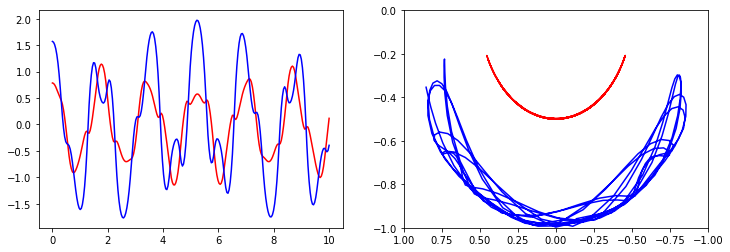

In [58]:
X0 = [pi/4, pi/2, 0, 0]
t = linspace(0, 10, 250)
X = odeint(dx, X0, t)

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(t, X[:,0], 'r', label="theta1")
axes[0].plot(t, X[:,1], 'b', label="theta2")


x1 = + L * sin(X[:,0])
y1 = - L * cos(X[:,0])
x2 = x1 + L * sin(X[:,1])
y2 = y1 - L * cos(X[:,1])

axes[1].plot(x1, y1, 'r', label="pendumlum1")
axes[1].plot(x2, y2, 'b', label="pendumlum2")
axes[1].set_ylim([-1,0])
axes[1].set_xlim([1,-1]);


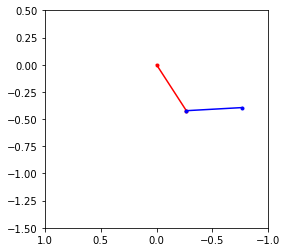

In [71]:
from IPython.display import display,clear_output
import time

fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):
    x1 = + L * sin(X[t_idx, 0])
    y1 = - L * cos(X[t_idx, 0])
    
    x2 = x1 + L * sin(X[t_idx, 1])
    y2 = y1 - L * cos(X[t_idx, 1])
    
    ax.cla()
    ax.plot([0,x1], [0,y1], 'r.-')
    ax.plot([x1,x2], [y1,y2], 'b.-')
    ax.set_ylim([-1.5,0.5])
    ax.set_xlim([1,-1])
    
    display(fig)
    clear_output()
    
    time.sleep(0.1)


## Example2: 阻尼谐振子

In [72]:
def dy(y, t, zeta ,w0):
    # The right-hand side of the damped oscillator ODE
    x, p = y[0], y[1]
    
    dx = p
    dp = -2*zeta*w0*p - w0**2*x
    return [dx, dp]

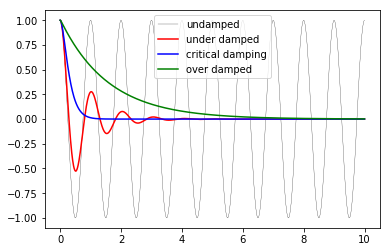

In [73]:
y0 = [1.0, 0.0]

t = linspace(0,10,1000)
w0 = 2*pi*1.0

y1 = odeint(dy, y0, t, args=(0.0, w0))
y2 = odeint(dy, y0, t, args=(0.2, w0))
y3 = odeint(dy, y0, t, args=(1.0, w0))
y4 = odeint(dy, y0, t, args=(5.0, w0))

fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label="critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend()


# 4. Fourier trandform (FFT)

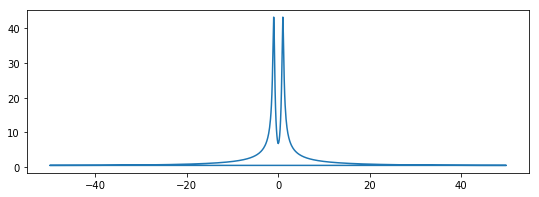

In [85]:
from scipy.fftpack import *

N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0])

w = fftfreq(N, dt)

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F))


(0, 5)

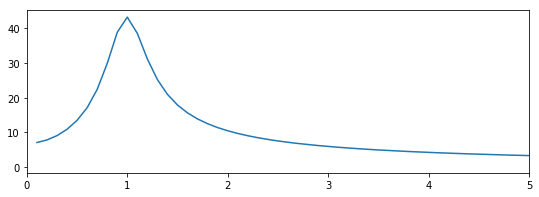

In [97]:
indices = where(w>0)

w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0,5)


# 5. Linear algebra

# 6. Optimization

# 7. Interpolation

# 8. Statistics